<a href="https://colab.research.google.com/github/ALAEDINE1212/project-/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
import os

# Loading olivetti dataset
print("Downloading the Olivetti Faces dataset...")
data = fetch_olivetti_faces(shuffle=True, download_if_missing=True)

images = data.images
targets = data.target

# directory to save faces
output_dir = "/content/olivetti_faces"
os.makedirs(output_dir, exist_ok=True)

# Saving images in directory
for i, img in enumerate(images):
    file_path = os.path.join(output_dir, f"face_{i}_label_{targets[i]}.png")
    plt.imsave(file_path, img, cmap='gray')

print(f"Dataset successfully downloaded and saved to: {output_dir}")

print("Sample files saved:")
!ls -lh /content/olivetti_faces | head -n 10


Dataset successfully downloaded and saved to: /content/olivetti_faces
Sample files saved:
total 3.2M
-rw-r--r-- 1 root root 7.1K Jan 10 15:30 face_0_label_13.png
-rw-r--r-- 1 root root 5.6K Jan 10 15:30 face_100_label_25.png
-rw-r--r-- 1 root root 7.1K Jan 10 15:30 face_101_label_6.png
-rw-r--r-- 1 root root 7.0K Jan 10 15:30 face_102_label_31.png
-rw-r--r-- 1 root root 6.2K Jan 10 15:30 face_103_label_15.png
-rw-r--r-- 1 root root 6.1K Jan 10 15:30 face_104_label_28.png
-rw-r--r-- 1 root root 5.8K Jan 10 15:30 face_105_label_34.png
-rw-r--r-- 1 root root 5.8K Jan 10 15:30 face_106_label_8.png
-rw-r--r-- 1 root root 6.1K Jan 10 15:30 face_107_label_34.png


Im

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=432a3afee740c86684174282d08b2ce8dddffc14162175f11090f1ed7009cb82
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
# Creating profiles
face_1 = face_recognition.load_image_file("/content/Alaedine.jpeg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("/content/Pana.jpeg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("/content/King Reyad.jpeg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding
]
known_face_names = [
    " Alaedine",
    " Pana",
    " Reyad"
]
print("Done learning and creating profiles")

Done learning and creating profiles


 Alaedine


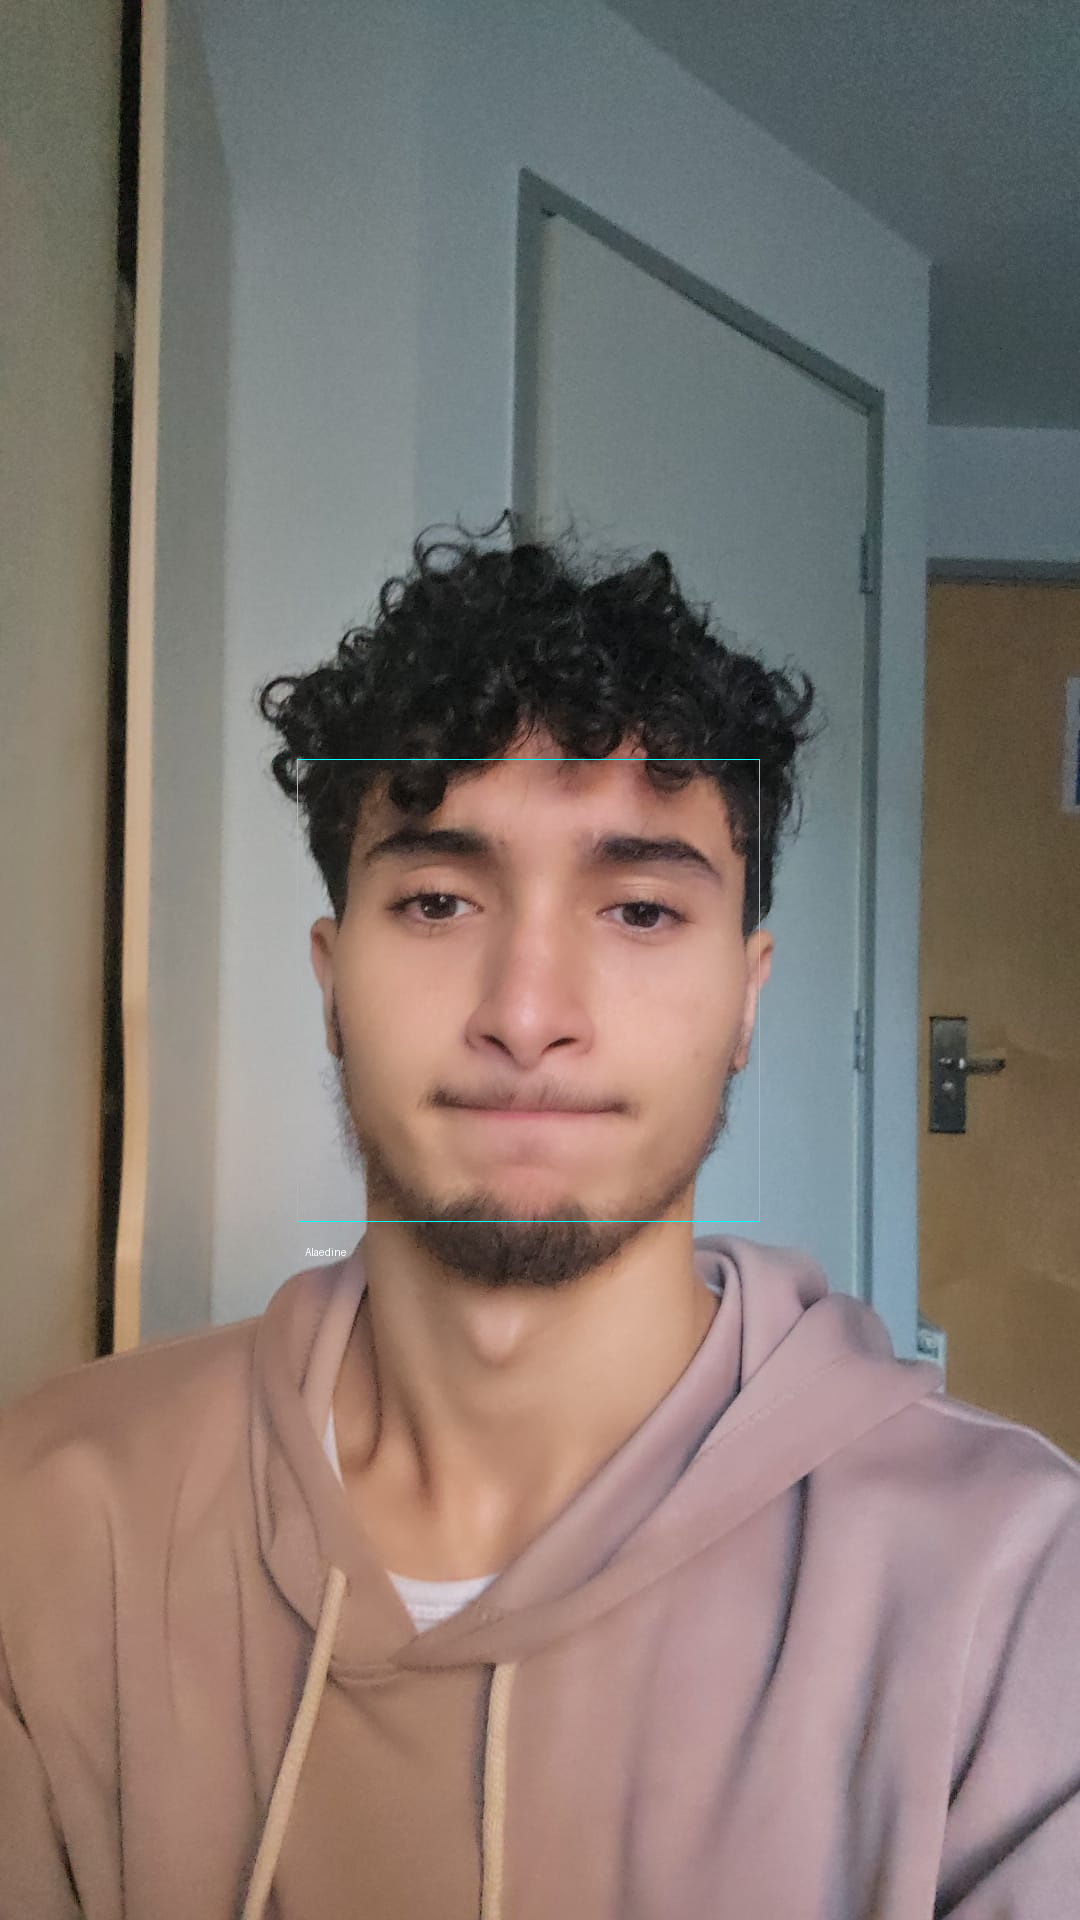

In [ ]:
unknown_image = face_recognition.load_image_file("/content/AIF.jpeg")

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # test if the faces are going to be recognized
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    print(name)

    # draw.rectangle)
    draw.text((left + 6, bottom  + 25), name, fill=(255, 255, 255, 255))

del draw

display(pil_image)

# **Creating and testing Facial recognition in videos**

In [ ]:
import cv2
import face_recognition
from google.colab.patches import cv2_imshow

# Known face encodings and the names
known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding
]
known_face_names = [
    " Alaedine",
    " Pana",
    " Reyad"
]

# video path
video_path = "/content/video.mp4"
video_capture = cv2.VideoCapture(video_path)

# Check if video is opened successfully
if not video_capture.isOpened():
    print("Error: Could not open video file.")
    exit()

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Initialize video writer to save the output
output_path = "output_video.avi"
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

frame_count = 0
while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        print("End of video reached or unable to read the video file.")
        break

    frame_count += 1

    # Process every 5th frame for efficiency
    if frame_count % 5 == 0:
        # Convert the frame to RGB for face_recognition
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect face locations and encodings in the frame
        face_locations = face_recognition.face_locations(rgb_frame)
        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

        face_names = []

        for face_encoding in face_encodings:
            # Compare the face with known encodings
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.6)
            name = "Unknown"

            # Find the best match
            if True in matches:
                best_match_index = matches.index(True)
                name = known_face_names[best_match_index]

            face_names.append(name)

        # Draw rectangles and labels around detected faces
        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Draw a rectangle around the face
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
            # Draw the label with the person's name below the rectangle
            cv2.putText(frame, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        # Display the processed frame in ccollab
        cv2_imshow(frame)

    # Write the processed frame to the output video
    out.write(frame)

# Release the video capture and writer
video_capture.release()
out.release()
print(f"Video processing completed. The output is saved as '{output_path}'.")


In [ ]:
# Configure Git with your details
!git config --global user.name "ALAEDINE1212"
!git config --global user.email "alaedinetamine@gmail.com"

# Clone your GitHub repository
!git clone https://github.com/ALAEDINE1212/project-rasa-and-vision.git

# Navigate to the repository folder
%cd project-rasa-and-vision

#
!cp /content/sample_data .

# Stage all changes
!git add .

# Commit the changes with a message
!git commit -m "Added project files from Colab"

# Push the changes to GitHub
!git push origin main

Cloning into 'project-rasa-and-vision'...
remote: Enumerating objects: 759, done.
remote: Total 759 (delta 0), reused 0 (delta 0), pack-reused 759 (from 2)
Receiving objects: 100% (759/759), 1.72 GiB | 25.52 MiB/s, done.
Resolving deltas: 100% (395/395), done.
Updating files: 100% (1238/1238), done.
/content/project-rasa-and-vision
cp: -r not specified; omitting directory '/content/sample_data'
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


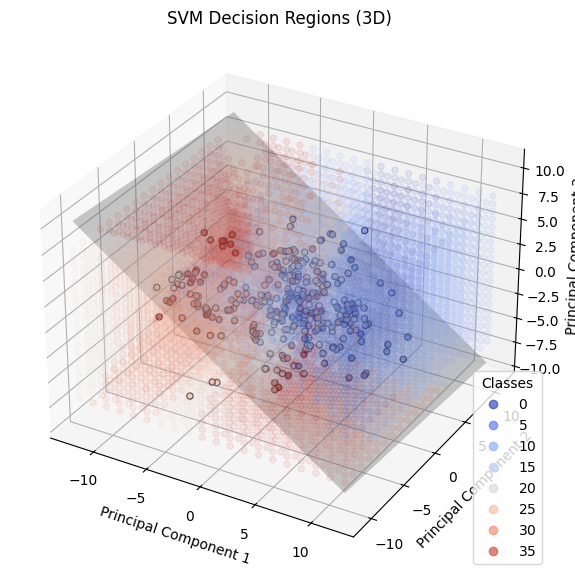

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
import numpy as np

# Step 1: Load the Olivetti dataset
data = fetch_olivetti_faces()
X = data.data  # Flattened image data (400 samples, 64x64 images flattened to 4096 features)
y = data.target  # Labels (0-39, one for each person)

# Step 2: Reduce dimensionality to 3D for visualization
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train an SVM classifier
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Step 5: Plot the 3D scatter and visualize decision regions and hyperplane
def plot_3d_decision_regions_with_hyperplane(clf, X, y):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter the data points
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, edgecolor='k', alpha=0.7)
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    ax.set_title("SVM Decision Regions (3D)")

    # Create a grid for prediction
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    xx, yy, zz = np.meshgrid(
        np.linspace(x_min, x_max, 20),
        np.linspace(y_min, y_max, 20),
        np.linspace(z_min, z_max, 20)
    )

    # Flatten the grid and make predictions
    grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    predictions = clf.predict(grid)

    # Reshape predictions to match grid
    predictions = predictions.reshape(xx.shape)

    # Plot prediction regions as scatter points (discrete)
    ax.scatter(xx.ravel(), yy.ravel(), zz.ravel(), c=predictions.ravel(), alpha=0.1, cmap=plt.cm.coolwarm)

    # Draw the hyperplane: calculate decision boundary
    w = clf.coef_[0]
    b = clf.intercept_[0]
    # Create a plane using the equation of the hyperplane
    # This defines the plane
    x1_range = np.linspace(x_min, x_max, 10)
    x2_range = np.linspace(y_min, y_max, 10)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    X3 = (-w[0] * X1 - w[1] * X2 - b) / w[2]

    ax.plot_surface(X1, X2, X3, color='gray', alpha=0.3)

    # Legend
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

# Call the function to plot
plot_3d_decision_regions_with_hyperplane(svm_clf, X_train, y_train)



In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Step 1: Load the Olivetti dataset
data = fetch_olivetti_faces()
X = data.data  # Flattened image data
y = data.target  # Labels

print(f"Dataset loaded: {X.shape[0]} images of shape {data.images[0].shape}, {len(np.unique(y))} unique people.")

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Standardize the feature values for better training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train an SVM classifier
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

print("Training completed!")

# Step 5: Evaluate the model
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Test with a new image
def predict_face(image, model, scaler):
    """Predicts the person in the given image."""
    image_flattened = scaler.transform(image.reshape(1, -1))  # Standardize and flatten the image
    prediction = model.predict(image_flattened)
    probability = model.predict_proba(image_flattened).max() * 100
    return prediction[0], probability

# Example: Testing on a sample image from the test set
test_image = X_test[0].reshape(64, 64)  # Reshape back to 64x64 for visualization
predicted_label, confidence = predict_face(X_test[0], svm_clf, scaler)

print(f"Predicted Person: {predicted_label}, Confidence: {confidence:.2f}%")


Dataset loaded: 400 images of shape (64, 64), 40 unique people.
Training completed!
Accuracy: 97.50%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          

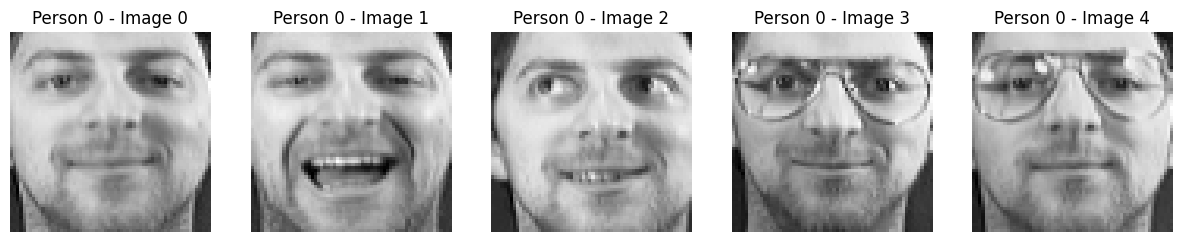

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

# Load the Olivetti dataset
data = fetch_olivetti_faces()
images = data.images
labels = data.target

# Select images of Person 0 (label 0)
person_0_images = images[labels == 0]

# Display the images of Person 0
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax[i].imshow(person_0_images[i], cmap="gray")
    ax[i].set_title(f"Person 0 - Image {i}")
    ax[i].axis("off")
plt.show()
